## Import the necessary software libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

%matplotlib inline

import warnings

# warnings.filterwarnings("ignore")

## Initialize the environment

In [3]:
env = Maze()

In [ ]:
frame = env.render(mode='rgb_array')
plt.imshow(frame)
plt.show()


In [4]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [4]:
action_values = np.zeros(shape=(5, 5, 4))

NameError: name 'np' is not defined

#### Plot $Q(s, a)$

In [ ]:
plot_action_values(action_values)

## Define the policy $\pi(s)$

#### Create the policy $\pi(s)$

In [1]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max())) 

#### Test the policy with state (0, 0)

In [8]:
action = policy((0,0))
print(f"Action taken in state (0,0): {action}")

Action taken in state (0,0): 0


#### Plot the policy

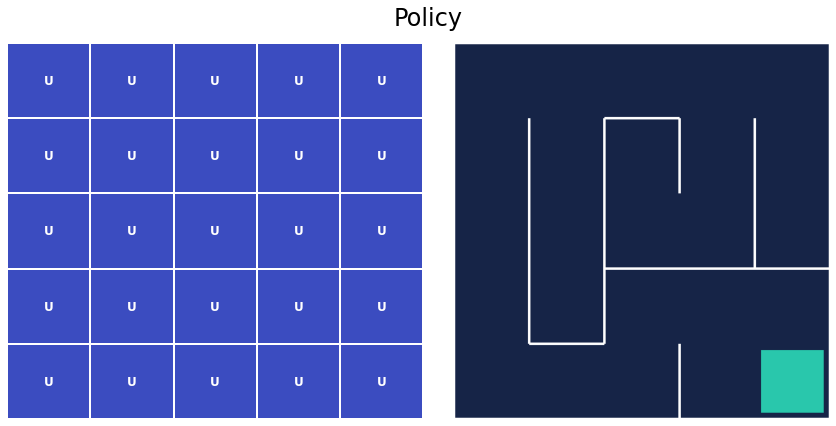

In [9]:
plot_policy(action_values, frame)

## Implement the algorithm


</br></br></br>

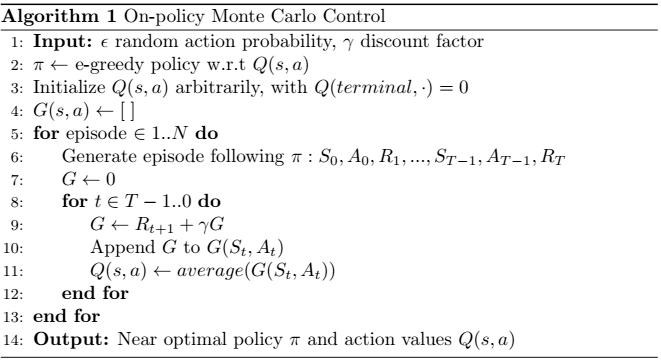


<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [2]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    
    sa_returns = {}
    
    for episode in range(1, episodes+1):
        state = env.reset()
        done = False
        transitions = []
        
        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state
        
        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            
            if not (state_t, action_t) in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])
            

In [3]:
on_policy_mc_control(policy, action_values, episodes=1000)

NameError: name 'action_values' is not defined

## Show results

#### Show resulting value table $Q(s, a)$

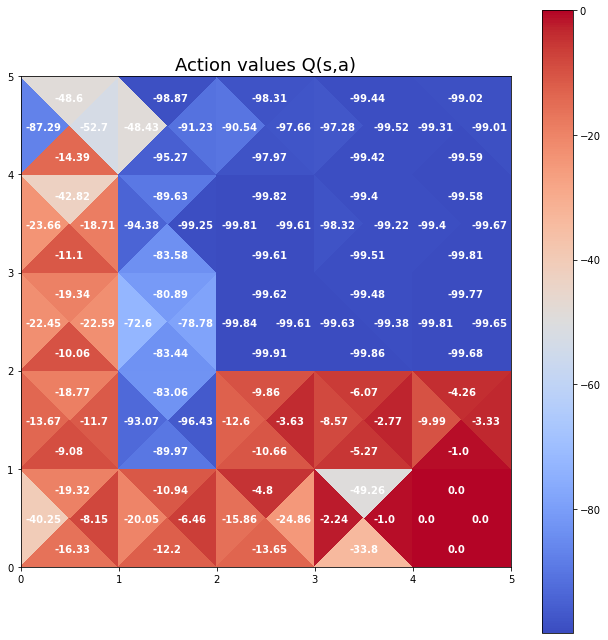

In [12]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

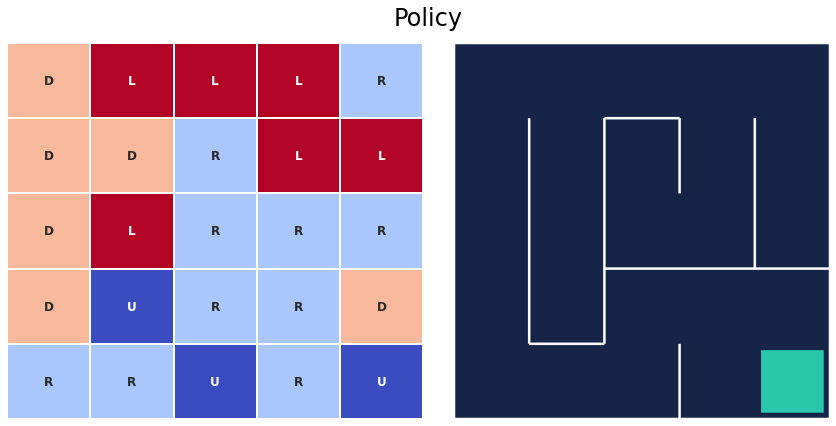

In [13]:
plot_policy(action_values, frame)

#### Test the resulting agent

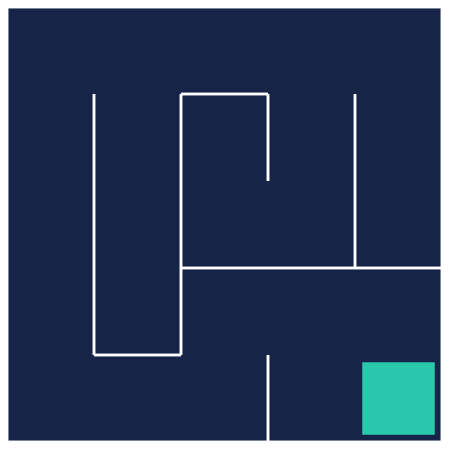

In [14]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)